# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

1. Is the distribution of the body temperature normal? I will use graphical method to test this.

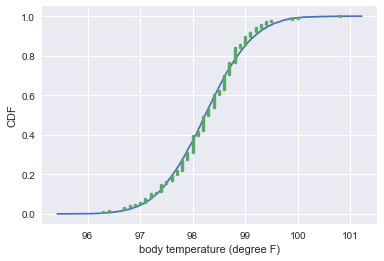

In [8]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
temp=df['temperature']
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y
samples=np.random.normal(np.mean(temp), np.std(temp), size=10000)
x,y=ecdf(temp)
x_theor, y_theor = ecdf(samples)
import seaborn as sns
sns.set()
_=plt.plot(x_theor, y_theor)
_=plt.plot(x, y, marker='.', linestyle='none')
_=plt.xlabel('body temperature (degree F)')
_=plt.ylabel('CDF')
plt.show()

This shows the body temperature is normally distributed.

2. Is the sample size large? Are the observations independent?


In [4]:
temp.shape

(130,)

In [5]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


There are 130 rows representing body temperature of 130 different people. Hence the sample size is large enough and the observations are independent, which qualifies CLT conditions.

3. Is the true population mean 98.6? Null is 98.6, Alternative is different from 98.6
First try a bootstrap hypothesis testing

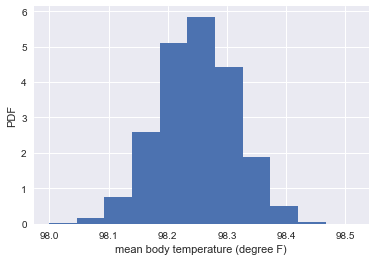

In [74]:
def bootstrap_replicate_1d(data, func):
    bs_sample=np.random.choice(data, len(data))
    return func(bs_sample)
bs_replicates=np.empty(10000)
for i in range(10000):
    bs_replicates[i]=bootstrap_replicate_1d(temp, np.mean)

_=plt.hist(bs_replicates, bins=11, density=True)
_=plt.xlabel('mean body temperature (degree F)')
_=plt.ylabel('PDF')
plt.show()

In [142]:
def draw_bs_reps(data, func, size=1):
    return np.array([bootstrap_replicate_1d(data, func) for _ in range(size)])
trans_temp= temp - np.mean(temp) + 98.6
bs_replicates= draw_bs_reps(trans_temp, np.mean, 10000)
p = np.sum(bs_replicates != 98.6) / 10000
print(p)

0.9992


p>0.05, cannot reject the null hypothesis, body temperature is 98.6

Next, we will try one sample test since we are only interested in the body temperature.
We will start with a t-test 

t= (mean_observed - mean_hypothesis) / (standard_deviation * sqrt(sample_size))

We will then calculate p_value using stats with degree of freedom df=sample_size - 1

In [106]:
t=(np.mean(temp)-98.6)/(np.std(temp)/(len(temp)**(1/2)))
from scipy import stats
p=1-stats.t.cdf(t,df=len(temp)-1)
print(p)

0.9999998905626769


p>0.05, cannot reject the null hypothesis, body temperature is 98.6

We will try z-test to see if there is any difference.

z=(mean_observed - mean_hypothesis) / (standard_deviation)

In [94]:
z=(np.mean(temp)-98.6)/(np.std(temp))
p_z=stats.norm.sf(abs(z))
print(p_z)

0.31551756279274257


p_z > 0.05 cannot reject the null hypothesis. Mean body temperature is 98.6

4. Draw a sample size of 10, repeat both t-test and z-test, what do you notice?

In [102]:
sample=np.random.choice(temp, 10)
t_sample=(np.mean(sample)-98.6)/(np.std(sample)/len(sample)**(1/2))
p_sample=1-stats.t.cdf(t_sample, df=len(sample)-1)
print(p_sample)

0.9828072071370794


Very close to p value of bigger sample size.

In [103]:
z_sample=(np.mean(sample)-98.6)/(np.std(sample))
p_z_sample=stats.norm.sf(abs(z_sample))
print(p_z_sample)

0.2154620871807379


different than bigger sample size. This means t-test is more accurate with small sample size. While t-test is for mean, z-test is for proportion.

5. Abnormal temperature is when body temperature is outside of the confidence interval.

Margin of errors formular:
1) t-test: Margin of errors= t x standard deviation 
2) z-test: Margin of errors= z x standard error or = z x standard deviation/ sqrt(sample size)

In [161]:
high_t= np.mean(temp) + np.mean(temp)*(t * np.std(temp))/100
low_t=np.mean(temp) - np.mean(temp)*(t*np.std(temp))/100
print(low_t, high_t)
high_z= np.mean(temp) + np.mean(temp)*(z * np.std(temp)/np.sqrt(len(temp)))/100
low_z=np.mean(temp) - np.mean(temp)*(z* np.std(temp)/np.sqrt(len(temp)))/100
print(low_z, high_z)
conf_int=np.percentile(bs_replicates, [2.5, 97.5])
print(conf_int)

102.17859534283329 94.31986619562826
98.27945665056617 98.21900488789538
[98.41842308 98.77846154]


The confidence interval from t-test is (102.17, 94.32)

The confidence interval from z-test is (98.22, 98.28)

The confidence interval from bootstrapping is (98.42, 98.78)

6. Is there a significant difference in the body temperature of males and females? First we need to separate the dataset into female and male data, then carrying bootstrapping method.


In [112]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [149]:
female_temp=df[df['gender']=='F']['temperature']
male_temp=df[df['gender']=='M']['temperature']

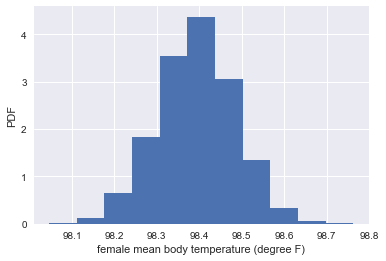

In [150]:
bs_replicates=np.empty(10000)
for i in range(10000):
    bs_replicates[i]=bootstrap_replicate_1d(female_temp, np.mean)

_=plt.hist(bs_replicates, bins=11, density=True)
_=plt.xlabel('female mean body temperature (degree F)')
_=plt.ylabel('PDF')
plt.show()

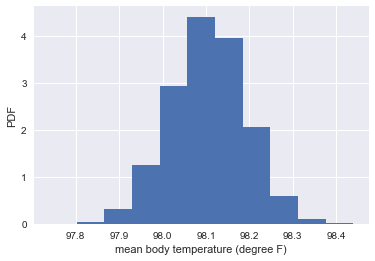

In [151]:
bs_replicates=np.empty(10000)
for i in range(10000):
    bs_replicates[i]=bootstrap_replicate_1d(male_temp, np.mean)
_=plt.hist(bs_replicates, bins=11, density=True)
_=plt.xlabel('mean body temperature (degree F)')
_=plt.ylabel('PDF')
plt.show()

In [155]:
shifted_fem=female_temp - np.mean(female_temp) + np.mean(temp)
shifted_mal = male_temp - np.mean(male_temp) + np.mean(temp)

bs_replicates_fem = draw_bs_reps(shifted_fem, np.mean, 10000)
bs_replicates_mal = draw_bs_reps(shifted_mal, np.mean, 10000)

bs_diff_replicates = bs_replicates_fem - bs_replicates_mal

mean_diff= np.mean(female_temp) - np.mean(male_temp)
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

print(p)

0.0119


p< 0.05 We can see that there is a signficant difference in female body temperature and male body temperature. Specically, female body temperature is higher than male body temperature.
This explains why even though it seems body temperature is different from 98.6 but the mean is still 98.6 because mean of both female and male temperature.